# Problem Statement:

## Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [1]:
#import all libraries-
#numpy for numerical operations
#pandas for dataframe operations
#matplotlib and seaborn for data visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the Apollo data comma seperated file and create panda dataframe

df=pd.read_csv("loantap.csv")

In [3]:
# checking top 5 rows

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
# checking bottom 5 rows
    
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


## Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [5]:
#gives the shape of dataframe

df.shape

(396030, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


In [9]:
for i in df.columns:
    print(i, ' : ',df[i].nunique())

loan_amnt  :  1397
term  :  2
int_rate  :  566
installment  :  55706
grade  :  7
sub_grade  :  35
emp_title  :  173105
emp_length  :  11
home_ownership  :  6
annual_inc  :  27197
verification_status  :  3
issue_d  :  115
loan_status  :  2
purpose  :  14
title  :  48817
dti  :  4262
earliest_cr_line  :  684
open_acc  :  61
pub_rec  :  20
revol_bal  :  55622
revol_util  :  1226
total_acc  :  118
initial_list_status  :  2
application_type  :  3
mort_acc  :  33
pub_rec_bankruptcies  :  9
address  :  393700


# Missing values and Outlier Treatment

In [10]:
 # checking null values (missing values)

df.isna().any()

#there is no null values in any column

loan_amnt               False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
emp_title                True
emp_length               True
home_ownership          False
annual_inc              False
verification_status     False
issue_d                 False
loan_status             False
purpose                 False
title                    True
dti                     False
earliest_cr_line        False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util               True
total_acc               False
initial_list_status     False
application_type        False
mort_acc                 True
pub_rec_bankruptcies     True
address                 False
dtype: bool

In [11]:
#This dataframe contain no null values...
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Obs- Here total 6 columns contains mising values which needs to be treated for proper analysis

In [12]:
df.quantile([0.05,0.1,0.2,0.90,0.95,0.97,0.99,1])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0.05,3250.0,6.89,109.5100,28000.0,4.68,5.0,0.0,1685.00,11.2,9.0,0.0,0.0
0.10,5000.0,7.89,158.8600,34000.0,6.90,6.0,0.0,3091.00,19.7,12.0,0.0,0.0
0.20,6625.0,9.67,218.8100,42000.0,10.01,7.0,0.0,5099.80,31.3,15.0,0.0,0.0
0.90,26000.0,19.52,785.4800,120000.0,28.50,18.0,1.0,31470.00,86.2,41.0,5.0,1.0
0.95,30975.0,21.97,925.6000,150000.0,31.58,21.0,1.0,41066.55,92.0,47.0,6.0,1.0
0.97,35000.0,23.28,1028.8013,175000.0,33.34,23.0,1.0,50070.26,94.7,52.0,7.0,1.0
0.99,35000.0,25.28,1202.3730,250000.0,36.43,27.0,2.0,86039.62,98.0,60.0,9.0,1.0
1.00,40000.0,30.99,1533.8100,8706582.0,9999.00,90.0,86.0,1743266.00,892.3,151.0,34.0,8.0


## Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [13]:
#df["mort_acc"]=df["mort_acc"].fillna(df["mort_acc vc"].median())
#df=df.dropna(subset=['revol_util','pub_rec_bankruptcies'])

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


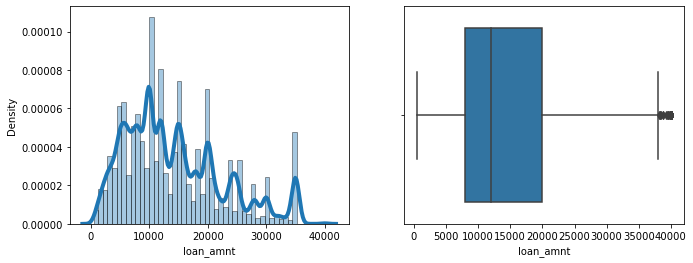

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


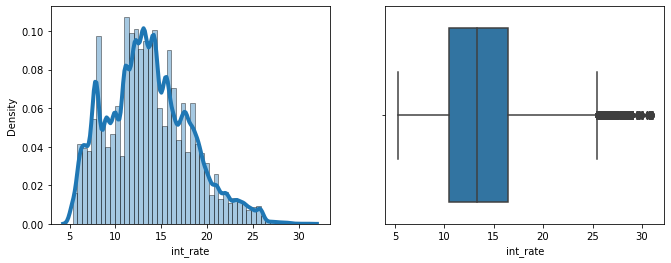

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


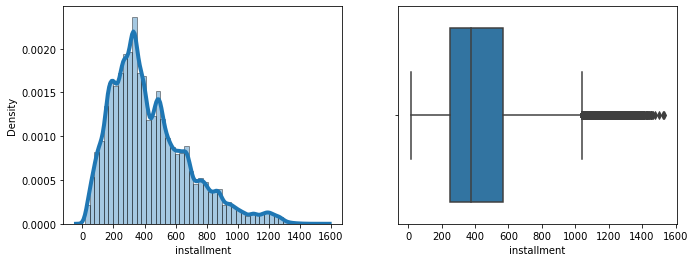

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


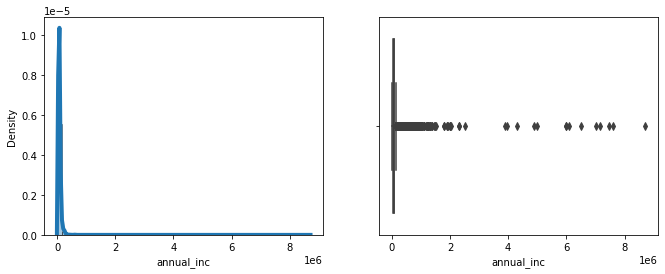

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


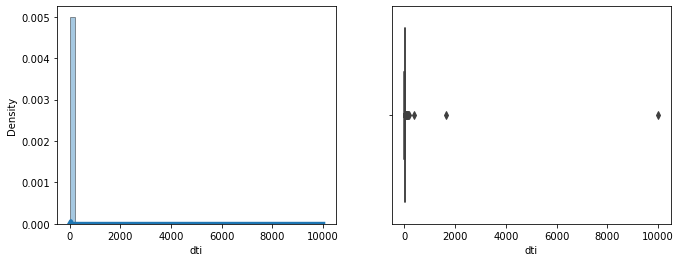

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


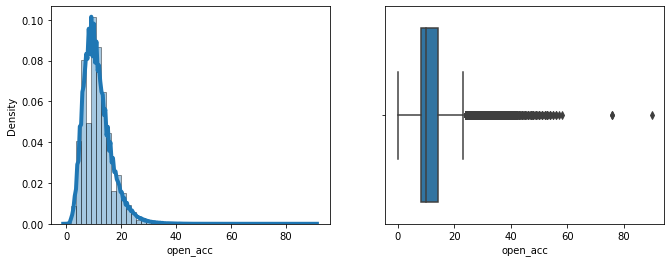

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


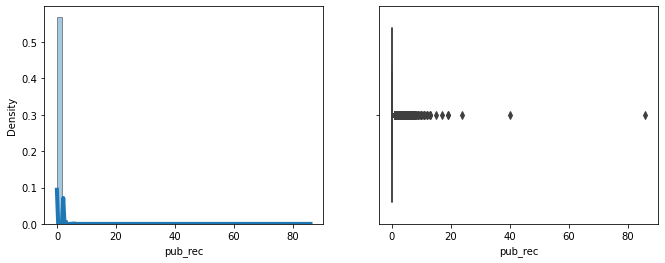

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


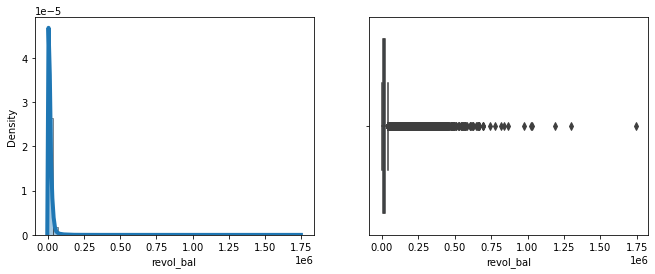

C:\Users\maila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


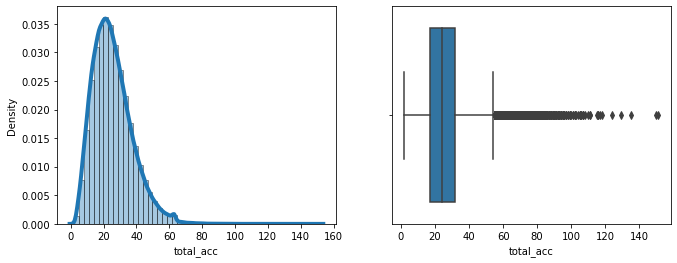

In [14]:
df_con=['loan_amnt', 'int_rate', 'installment','annual_inc','dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']
for i in range(len(df_con)):
    if df[df_con[i]].nunique() > 8:
        plt.figure(figsize=(11,4))
        plt.subplot(1,2,1)
        sns.distplot(df[df_con[i]],hist=True,kde=True,hist_kws={'edgecolor':'black'},kde_kws ={"linewidth":4})
        plt.subplot(1,2,2)
        sns.boxplot(df[df_con[i]])
        plt.show()

C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


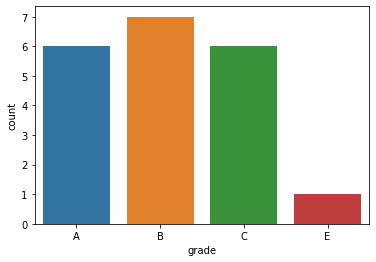

C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


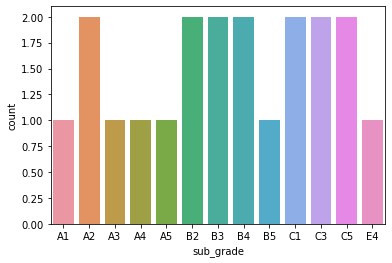

C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


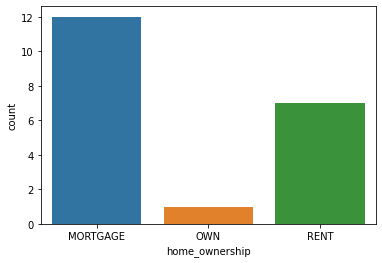

C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


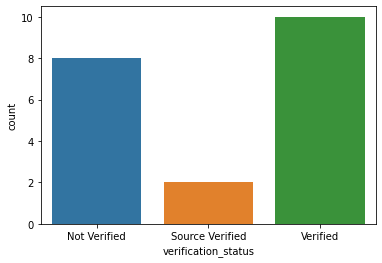

C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


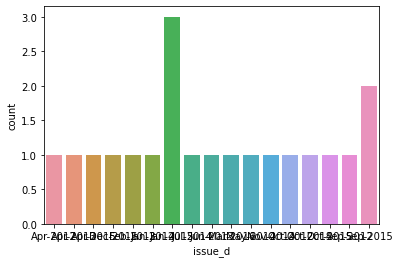

C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


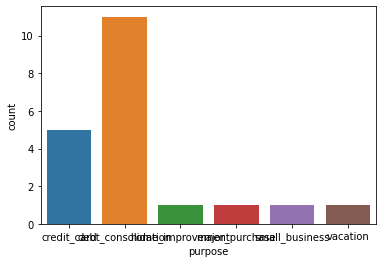

C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


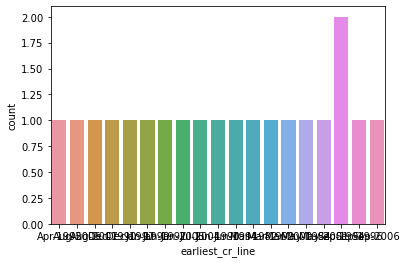

C:\Users\maila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


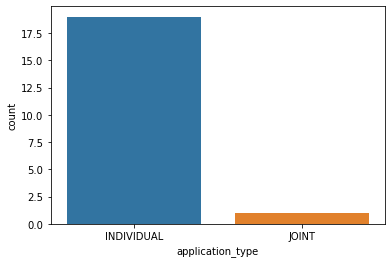

In [15]:
df_obj=['grade', 'sub_grade', 'home_ownership','verification_status', 'issue_d', 'purpose','earliest_cr_line', 'application_type']
for i in range(len(df_obj)):
    sns.countplot(df[df_obj[i]][:20,].sort_values())
    plt.show()

Obs-


term- 36 months (The number of payments on the loan) are more in dataset.

Grade- B grade are more then A and C are almost equal...E is the lesser one

emp_length- 10+year employment length are more

Home_ownership- mortgage people are more then rented then own one.

verification status- verified are more then non verified and source verified are less

loan-status- target variables say fully paid are more that means data is imbalanced.

application_status- Individual type of applications are more

## Bivariate Analysis (Relationships between important variable)


In [16]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


<AxesSubplot:xlabel='installment', ylabel='loan_status'>

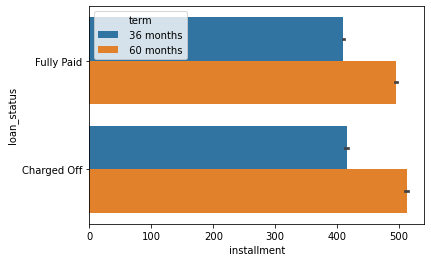

In [17]:
sns.barplot(x='installment',y='loan_status',data=df,hue="term")

<AxesSubplot:xlabel='home_ownership', ylabel='annual_inc'>

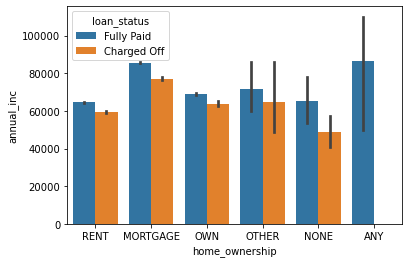

In [18]:
sns.barplot(x='home_ownership',y='annual_inc',data=df,hue="loan_status")

<AxesSubplot:xlabel='installment', ylabel='loan_status'>

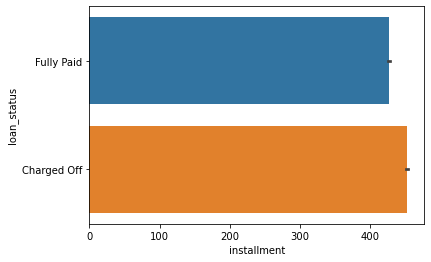

In [19]:
sns.barplot(x='installment',y="loan_status",data=df)

<AxesSubplot:xlabel='mort_acc', ylabel='loan_status'>

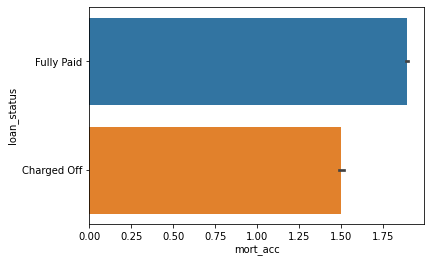

In [20]:
sns.barplot(x='mort_acc',y="loan_status",data=df)

# Data Preprocessing

### Duplicate value check

In [21]:
df[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


### Outlier treatment

In [22]:
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.97)]
df = df[df['int_rate'] < df['int_rate'].quantile(0.97)]
df = df[df['loan_amnt']< df['loan_amnt'].quantile(0.97)]
df = df[df['installment'] < df['installment'].quantile(0.97)]
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.97)]
df = df[df['open_acc'] < df['open_acc'].quantile(0.97)]
df = df[df['total_acc'] < df['total_acc'].quantile(0.97)]
df = df[df['revol_util'] < df['revol_util'].quantile(0.97)]
df = df[df['dti'] < df['dti'].quantile(0.97)]
df = df[df['pub_rec'] < df['pub_rec'].quantile(0.99)]
df = df[df['revol_bal'] < df['revol_bal'].quantile(0.95)]

### Feature Engineering

## Check correlation among independent variables and how they interact with each other

<AxesSubplot:>

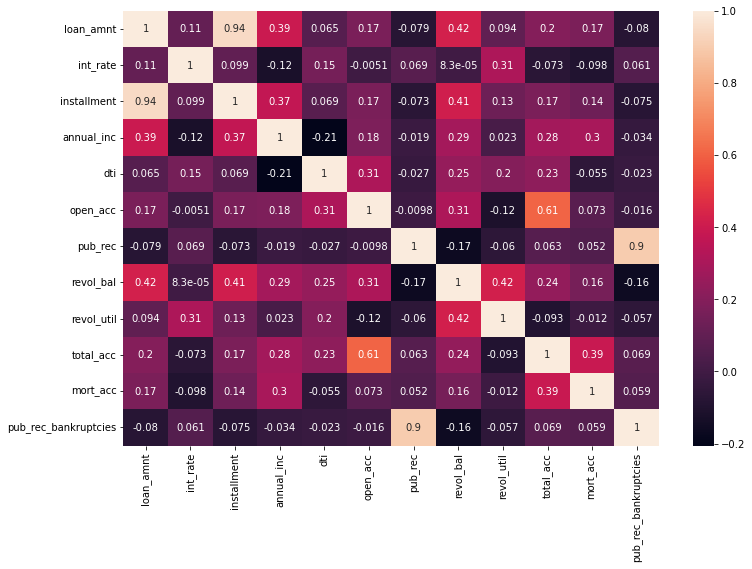

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Obs- 

installment and loan_amt are highly correlated

total_acc and open_acc are also correlated.

pub_rec and pu_rec_ankrupties are also somewhat correlated

In [24]:
# drop loan amount as it is of no use.
df.drop("loan_amnt",inplace=True,axis=1)

In [25]:
#extracting pincode from address then drop the address field

df['pincode'] = df['address'].str[-5:]
df.drop("address",inplace=True,axis=1)

In [26]:
# emp_title seems to be of no use as it contains sentential data so drop it
df.drop("emp_title",inplace=True,axis=1)

In [27]:
# title seems to be of no use as it contains sentential data so drop it
df.drop(["title","grade"],inplace=True,axis=1)

In [28]:
# replacing the null values with -1 and greater than 10years with 11 and lessthan 1 year with 0
df['emp_length'].replace({'< 1 year':'0 years','10+ years':'11 years',np.nan:'-1 years'},inplace=True)

In [29]:
df['emp_length']=df['emp_length'].str[:-5]
df['emp_length']=df['emp_length'].astype('int64')

In [30]:
df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].apply(lambda x: 1 if x >=1.0 else 0)
df["pub_rec"]=df["pub_rec"].apply(lambda x: 1 if x >=1.0 else 0)
df["mort_acc"]=df["mort_acc"].apply(lambda x: 1 if x >=1.0 else 0)

In [31]:
#extracting year and month and storing as new series
df['earliest_cr_line_month'] = df['earliest_cr_line'].str[:3]
df['earliest_cr_line_year'] = df['earliest_cr_line'].str[-4:]
df.drop(['earliest_cr_line'],inplace=True,axis = 1)

df['earliest_cr_line_year']=df['earliest_cr_line_year'].astype('int64')

In [32]:
df['earliest_cr_line_month'].replace({'Jan':1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12},inplace=True)

In [33]:
#extracting year and month and storing as new series
df['issue_month'] = df['issue_d'].str[:3]
df['issue_year'] = df['issue_d'].str[-4:]
df.drop(['issue_d'],inplace=True,axis = 1)

df['issue_year']=df['issue_year'].astype('int64')

In [34]:
df['issue_month'].replace({'Jan':1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12},inplace=True)

### Missing value treatment

In [35]:
# missing value treatment
mean_value=df['revol_util'].mean()
df['revol_util'].fillna(value=mean_value, inplace=True)

mode_value=df['mort_acc'].mode()
df['mort_acc'].fillna(value=mode_value, inplace=True)

### One hot encoding

In [36]:
# Creating a dummy variable for the variable 'verification_status' and dropping the first one.
pm = pd.get_dummies(df['verification_status'],prefix='verification_status',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,pm],axis=1)

# Creating a dummy variable for the variable 'term' and dropping the first one.
pm = pd.get_dummies(df['term'],prefix='term',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,pm],axis=1)

# Creating a dummy variable for the variable 'application_type' and dropping the first one.
pm = pd.get_dummies(df['application_type'],prefix='application_type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,pm],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(df['initial_list_status'],prefix='initial_list_status',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,pm],axis=1)

In [37]:
df.drop(["term","verification_status",'application_type',"initial_list_status"],inplace=True,axis=1)

In [38]:
# replacing values of target variable
df.replace(to_replace=["Fully Paid","Charged Off"],
           value=[1,0],inplace=True)

### Target Encoding

In [39]:
pip install category_encoders

In [40]:
import category_encoders as ce

tenc1=ce.TargetEncoder() 
df["home_ownership"]=tenc1.fit_transform(df['home_ownership'],df['loan_status'])

tenc2=ce.TargetEncoder() 
df["sub_grade"]=tenc2.fit_transform(df['sub_grade'],df['loan_status'])

tenc7=ce.TargetEncoder() 
df["purpose"]=tenc7.fit_transform(df['purpose'],df['loan_status'])

tenc12=ce.TargetEncoder() 
df["pincode"]=tenc12.fit_transform(df['pincode'],df['loan_status'])

C:\Users\maila\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\maila\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
C:\Users\maila\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\maila\anaconda3\lib\site-packages\category_encoders\target_e

# Min-Max Scaler(standardization)

In [41]:
from sklearn.preprocessing import minmax_scale
#Normalisation
for col in df.columns:
    df[col] = minmax_scale(df[col])
df.head()

,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,...,earliest_cr_line_month,earliest_cr_line_year,issue_month,issue_year,verification_status_Source Verified,verification_status_Verified,term_ 60 months,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w
1,0.371795,0.290129,0.733137,0.416667,0.414469,0.451865,1.0,0.499498,0.664557,0.80,...,0.545455,0.869565,0.000000,0.888889,0.0,0.0,0.0,1.0,0.0,0.0
2,0.288183,0.570790,0.795895,0.083333,0.168038,0.289320,1.0,0.704550,0.385473,0.60,...,0.636364,0.913043,0.000000,0.888889,1.0,0.0,0.0,1.0,0.0,0.0
3,0.065217,0.237752,0.960497,0.583333,0.168038,0.370381,1.0,0.704550,0.078360,0.25,...,0.727273,0.898551,0.909091,0.777778,0.0,0.0,0.0,1.0,0.0,0.0
6,0.000000,0.611618,1.000000,0.250000,0.414469,0.896323,1.0,0.709533,0.040989,0.35,...,0.636364,0.884058,0.727273,0.888889,1.0,0.0,0.0,1.0,0.0,0.0
7,0.324415,0.477155,0.829278,1.000000,0.168038,0.311120,1.0,0.704550,0.809825,0.50,...,0.727273,0.724638,0.727273,0.555556,0.0,0.0,0.0,1.0,0.0,0.0


# Model building 

### Build the Logistic Regression model

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variable to X
X = df.drop(['loan_status'],axis=1)

# Putting response variable to y
y = df['loan_status']

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [45]:

# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

# Predicted probabilities
y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)
print(y_pred,y_pred_prob)

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_recall_curve

print(classification_report(y_pred,y_test))

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob[:,1])

C:\Users\maila\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1. 1. 1. ... 1. 1. 0.] [[2.54469545e-01 7.45530455e-01]
 [2.92602213e-03 9.97073978e-01]
 [4.39722291e-01 5.60277709e-01]
 ...
 [1.92705953e-01 8.07294047e-01]
 [2.97673632e-03 9.97023264e-01]
 [9.99999977e-01 2.31090421e-08]]
              precision    recall  f1-score   support

         0.0       0.45      0.95      0.61      7284
         1.0       0.99      0.89      0.94     75495

    accuracy                           0.90     82779
   macro avg       0.72      0.92      0.78     82779
weighted avg       0.95      0.90      0.91     82779



0.9028818296148571

<AxesSubplot:>

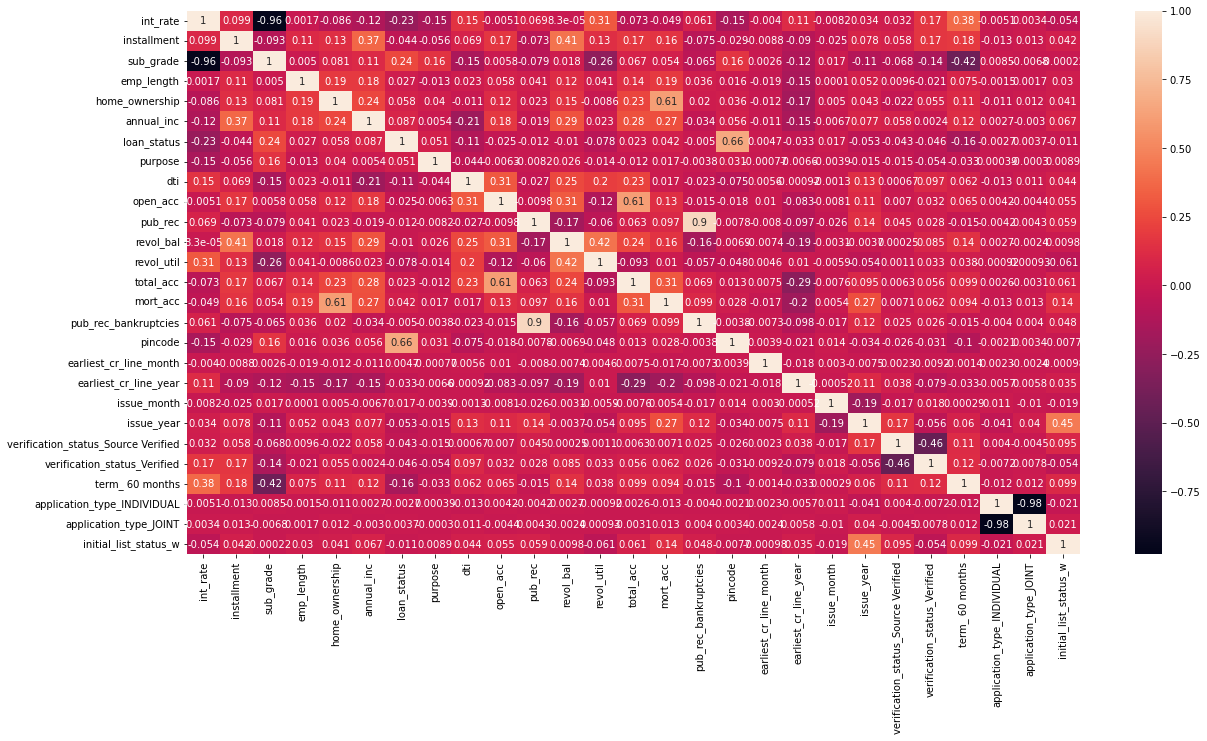

In [46]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

In [47]:
df.columns

Index(['int_rate', 'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_month', 'issue_year',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 60 months', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w'],
      dtype='object')

In [48]:
#removed ones are- 'sub_grade','open_acc', 'pub_rec',application_type_INDIVIDUAL
col=['int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_month', 'issue_year',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 60 months',
       'application_type_JOINT', 'initial_list_status_w']

In [49]:
final_df=df[col]

final_df=pd.concat([df["loan_status"], final_df], axis=1)

# Putting feature variable to X
X = final_df.drop(['loan_status'],axis=1)

# Putting response variable to y
y = final_df['loan_status']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

C:\Users\maila\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# Predicted probabilities
y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)
print(y_pred,y_pred_prob)

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_recall_curve

print(classification_report(y_pred,y_test))

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob[:,1])

[1. 1. 1. ... 1. 1. 0.] [[3.00647813e-01 6.99352187e-01]
 [2.16497643e-03 9.97835024e-01]
 [4.27118020e-01 5.72881980e-01]
 ...
 [1.73163561e-01 8.26836439e-01]
 [2.57812340e-03 9.97421877e-01]
 [9.99999987e-01 1.29971602e-08]]
              precision    recall  f1-score   support

         0.0       0.45      0.96      0.61      7085
         1.0       1.00      0.89      0.94     75694

    accuracy                           0.90     82779
   macro avg       0.72      0.93      0.78     82779
weighted avg       0.95      0.90      0.91     82779



0.9016128368876813

In [51]:
import statsmodels.api as sm

In [52]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               193149
Model:                            GLM   Df Residuals:                   193126
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48418.
Date:                Sun, 27 Nov 2022   Deviance:                       96837.
Time:                        17:54:58   Pearson chi2:                 1.10e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3639
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.0325      1.029    -27.246      0.000     -30.049     -26.016
int_rate                               -1.8499      0.045    -41.364      0.000      -1.938      -1.762
installment                            -0.5388      0.046    -11.718      0.000      -0.629      -0.449
emp_length                              0.1443      0.024      5.961      0.000       0.097       0.192
home_ownership                          0.6584      0.090      7.286      0.000       0.481       0.835
annual_inc                              1.1585      0.057     20.246      0.000       1.046       1.271
purpose                                 0.5158      0.066      7.818      0.000       0.386       0.645
dti                                    -0.6563      0.041    -15.939      0.000      -0.737      -0.576
revol_bal                               0.1992      0.048      4.120      0.000       0.104       0.294
revol_util                             -0.3450      0.040     -8.565      0.000      -0.424      -0.266
total_acc                               0.1795      0.046      3.911      0.000       0.090       0.269
mort_acc                                0.1015      0.022      4.524      0.000       0.057       0.145
pub_rec_bankruptcies                    0.0412      0.026      1.569      0.117      -0.010       0.093
pincode                                37.3585      1.254     29.797      0.000      34.901      39.816
earliest_cr_line_month                  0.0340      0.026      1.307      0.191      -0.017       0.085
earliest_cr_line_year                   0.2277      0.089      2.572      0.010       0.054       0.401
issue_month                             0.0426      0.027      1.574      0.115      -0.010       0.096
issue_year                             -0.7883      0.062    -12.620      0.000      -0.911      -0.666
verification_status_Source Verified    -0.1806      0.021     -8.683      0.000      -0.221      -0.140
verification_status_Verified           -0.0727      0.022     -3.375      0.001      -0.115      -0.030
term_ 60 months                        -0.5684      0.021    -27.112      0.000      -0.609      -0.527
application_type_JOINT                  0.7900      0.316      2.498      0.012       0.170       1.410
initial_list_status_w                   0.0246      0.019      1.312      0.189      -0.012       0.061
=======================================================================================================
"""

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['feature'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
# take a look
VIF

,feature,VIF
0,int_rate,7.316411
1,installment,6.585332
2,emp_length,3.845067
3,home_ownership,11.187143
4,annual_inc,9.042364
5,purpose,18.070250
6,dti,7.879120
7,revol_bal,5.707782
8,revol_util,8.743713
9,total_acc,7.811597


In [54]:
col=['int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode', 'earliest_cr_line_month', 'issue_month',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 60 months',
       'application_type_JOINT', 'initial_list_status_w']

In [55]:
final_df=df[col]

final_df=pd.concat([df["loan_status"], final_df], axis=1)

# Putting feature variable to X
X = final_df.drop(['loan_status'],axis=1)

# Putting response variable to y
y = final_df['loan_status']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

# Predicted probabilities
y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)
#print(y_pred,y_pred_prob)

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_recall_curve

print(classification_report(y_pred,y_test))

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob[:,1])

              precision    recall  f1-score   support

         0.0       0.45      0.96      0.61      7051
         1.0       1.00      0.89      0.94     75728

    accuracy                           0.90     82779
   macro avg       0.72      0.93      0.78     82779
weighted avg       0.95      0.90      0.91     82779



0.9009855201628001

<AxesSubplot:>

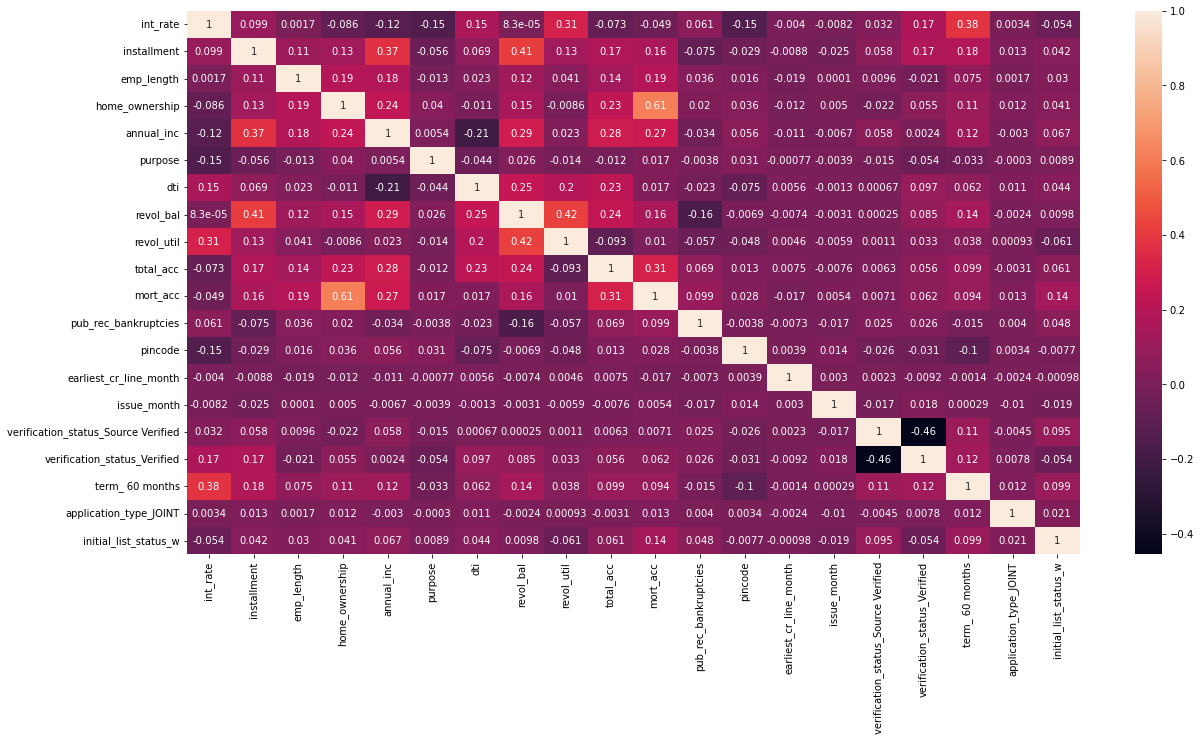

In [56]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df[col].corr(),annot = True)

In [57]:
col=['int_rate', 'installment', 'emp_length',
       'annual_inc', 'purpose', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode', 'earliest_cr_line_month', 'issue_month',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 60 months',
       'application_type_JOINT', 'initial_list_status_w']

In [58]:
final_df=df[col]

final_df=pd.concat([df["loan_status"], final_df], axis=1)

# Putting feature variable to X
X = final_df.drop(['loan_status'],axis=1)

# Putting response variable to y
y = final_df['loan_status']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

# Predicted probabilities
y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)
#print(y_pred,y_pred_prob)

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_recall_curve

print(classification_report(y_pred,y_test))

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob[:,1])

              precision    recall  f1-score   support

         0.0       0.45      0.96      0.61      7026
         1.0       1.00      0.89      0.94     75753

    accuracy                           0.90     82779
   macro avg       0.72      0.93      0.77     82779
weighted avg       0.95      0.90      0.91     82779



C:\Users\maila\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9006121018807658

In [59]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               193149
Model:                            GLM   Df Residuals:                   193129
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48537.
Date:                Sun, 27 Nov 2022   Deviance:                       97074.
Time:                        17:55:32   Pearson chi2:                 1.10e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3631
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.2118      1.025    -27.518      0.000     -30.221     -26.202
int_rate                               -1.9080      0.044    -43.040      0.000      -1.995      -1.821
installment                            -0.5540      0.046    -12.068      0.000      -0.644      -0.464
emp_length                              0.1563      0.024      6.489      0.000       0.109       0.203
annual_inc                              1.1465      0.057     20.095      0.000       1.035       1.258
purpose                                 0.5227      0.065      8.015      0.000       0.395       0.651
dti                                    -0.7330      0.041    -18.029      0.000      -0.813      -0.653
revol_bal                               0.2170      0.048      4.536      0.000       0.123       0.311
revol_util                             -0.2951      0.040     -7.377      0.000      -0.374      -0.217
total_acc                               0.1833      0.045      4.081      0.000       0.095       0.271
mort_acc                                0.1405      0.018      7.863      0.000       0.105       0.176
pub_rec_bankruptcies                    0.0070      0.026      0.270      0.787      -0.044       0.058
pincode                                37.3524      1.253     29.802      0.000      34.896      39.809
earliest_cr_line_month                  0.0327      0.026      1.260      0.208      -0.018       0.084
issue_month                             0.1220      0.026      4.637      0.000       0.070       0.174
verification_status_Source Verified    -0.2167      0.021    -10.500      0.000      -0.257      -0.176
verification_status_Verified           -0.0719      0.021     -3.345      0.001      -0.114      -0.030
term_ 60 months                        -0.5407      0.021    -26.005      0.000      -0.581      -0.500
application_type_JOINT                  0.6872      0.317      2.168      0.030       0.066       1.308
initial_list_status_w                  -0.0785      0.017     -4.591      0.000      -0.112      -0.045
=======================================================================================================
"""

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['feature'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
# take a look
VIF

,feature,VIF
0,int_rate,6.650463
1,installment,6.520797
2,emp_length,3.781172
3,annual_inc,8.631234
4,purpose,13.191463
5,dti,7.268200
6,revol_bal,5.538830
7,revol_util,8.593029
8,total_acc,7.746368
9,mort_acc,2.400957


In [61]:
col=['int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode', 'earliest_cr_line_month', 'issue_month',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 60 months',
       'application_type_JOINT', 'initial_list_status_w']

In [62]:
final_df=df[col]

final_df=pd.concat([df["loan_status"], final_df], axis=1)

# Putting feature variable to X
X = final_df.drop(['loan_status'],axis=1)

# Putting response variable to y
y = final_df['loan_status']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

# Predicted probabilities
y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)
#print(y_pred,y_pred_prob)



In [63]:
## Model Coefficients
logsk.coef_

array([[-1.94557097e+00, -5.64221287e-01,  1.53852201e-01,
         1.12884960e+00, -7.38670231e-01,  2.33041368e-01,
        -2.85935867e-01,  1.76434665e-01,  1.42964825e-01,
         9.41048799e-03,  2.52481560e+01,  3.22991769e-02,
         1.20242413e-01, -2.20881695e-01, -7.81402012e-02,
        -5.32206459e-01,  6.13702809e-01, -7.71180362e-02]])

In [64]:
print(list(zip(logsk.coef_, logsk.feature_names_in_)))

[(array([-1.94557097e+00, -5.64221287e-01,  1.53852201e-01,  1.12884960e+00,
       -7.38670231e-01,  2.33041368e-01, -2.85935867e-01,  1.76434665e-01,
        1.42964825e-01,  9.41048799e-03,  2.52481560e+01,  3.22991769e-02,
        1.20242413e-01, -2.20881695e-01, -7.81402012e-02, -5.32206459e-01,
        6.13702809e-01, -7.71180362e-02]), 'int_rate')]


In [66]:
for idx, col_name in enumerate(X_train[col].columns):
    print("The coefficient for {} is {}".format(col_name, logsk.coef_[0][idx]))

The coefficient for int_rate is -1.945570974829541
The coefficient for installment is -0.5642212865334595
The coefficient for emp_length is 0.15385220112393078
The coefficient for annual_inc is 1.1288496000042982
The coefficient for dti is -0.7386702313454339
The coefficient for revol_bal is 0.23304136801227796
The coefficient for revol_util is -0.28593586686161404
The coefficient for total_acc is 0.17643466454100049
The coefficient for mort_acc is 0.1429648245280858
The coefficient for pub_rec_bankruptcies is 0.00941048798632624
The coefficient for pincode is 25.248156041839486
The coefficient for earliest_cr_line_month is 0.03229917688187014
The coefficient for issue_month is 0.12024241314180575
The coefficient for verification_status_Source Verified is -0.22088169469930874
The coefficient for verification_status_Verified is -0.0781402012315637
The coefficient for term_ 60 months is -0.5322064587245512
The coefficient for application_type_JOINT is 0.6137028093483761
The coefficient f

# Classification Report (Confusion Matrix,ROC-AUC Score) 

In [67]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 6762,  8397],
       [  265, 67355]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_recall_curve

print(classification_report(y_pred,y_test))

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob[:,1])

              precision    recall  f1-score   support

         0.0       0.45      0.96      0.61      7027
         1.0       1.00      0.89      0.94     75752

    accuracy                           0.90     82779
   macro avg       0.72      0.93      0.77     82779
weighted avg       0.95      0.90      0.91     82779



0.9004404402752102

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['feature'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
# take a look
VIF

,feature,VIF
0,int_rate,6.623314
1,installment,6.517397
2,emp_length,3.756393
3,annual_inc,8.394834
4,dti,7.096152
5,revol_bal,5.531103
6,revol_util,8.394839
7,total_acc,7.667837
8,mort_acc,2.400582
9,pub_rec_bankruptcies,1.204281


# ROC AUC Curve & comments

Text(0, 0.5, 'True Positive rate')

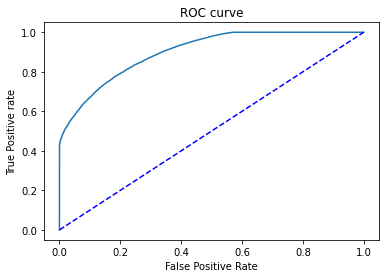

In [70]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


plt.plot(fpr,tpr)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

As the curve is above the centre line, AUC is between 0.5 and 1. Hence, there is a high chance that the classifier will be able to distinguish between positive class values from the negative class values correctly.

# Precision Recall Curve & comments

Text(0, 0.5, 'Precision')

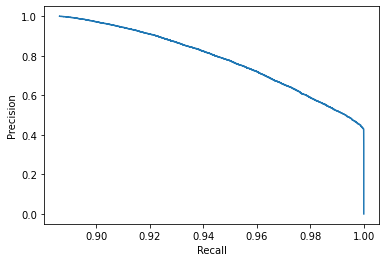

In [71]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])
plt.plot(precision,recall)

plt.xlabel('Recall')
plt.ylabel('Precision')

As the area under the above curve is relatively high, which represents high recall anf high precision.

As, high precision relates to a low false positive rate and high recall related to low false negative rate. Hence, chances of predicting true positive and true negative is higher.

### Trade off Questions

 1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
 - As seen in the dataset, the percentage of defaulters i.e.~20% is higher than Banking industry standards. Therefore, we need to maintain very less false positive for which, oversampling techniques like SMOTE should be used. Also, more complex algorithms like Decision Trees, Random Forest with various hyper-parameter tunning can be used. 
 
 
 2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
 - Yes. LoanTap should not disburse loans to everyone. Company’s internal policy and analysis should be in place to identify the correct persons. From data provided, 20% of people default on their loan, which inturn become NPAs for the company.
 - Low False positive means we should create the model with high Precision values. This can be achieved if we are keeping high threshold value in logistic Regression model.
 - But keeping too high values for threshold will increase False Negatives. This intuen may result in opportunity loss. In this case we will not give loans to persons which will not default but our model has predicted that they will default.  

### Questionnaire

1. What percentage of customers have fully paid their Loan Amount?
  - 80.4% of customers have fully paid their Loan Amount


2. Comment about the correlation between Loan Amount and Installment features.
  - Correlation value of installment and loan_amnt is 0.95 which means they are hihly correlated.,we will drop loan amount in model creation.


3. The majority of people have home ownership as ___.
  - Mortgage is the most common home ownership which is approximately 50%


4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)?
  - Out of the all people in Grade A, 93% got their loan Fully Paid. Hence, the statement is True.


5. Name the top 2 afforded job titles.?
  - The two most affordable job title are Teacher and Manager


6. Thinking from a bank's perspective, which metric should our primary focus be on..
    ROC AUC
    Precision
    Recall
    F1 Score
 - F1 score is the best metric as here precision and recall both are important. This is because we do not want to miss the potential customer and also don't want to give loan to defaulters at the same time.


7. How does the gap in precision and recall affect the bank?
  - If the Recall value is low ie. False Negative is high, it means Bank is loosing opportunity cost
  - If Precision value is low ie. Flase Positive is high, it means Bank defaulters may increase.


8. Which were the features that heavily affected the outcome?
  - int_rate
  - installment
  - annual_inc
  - pincode
  - dti
  - term
  - application_type


9. Will the results be affected by geographical location? (Yes/No)
  - Yes, pincode derived from address is having high coefficient value so location matters.

### Insights
 - There are approximately 80% of loans which are fully paid whereas 20% are defaulters.
 - Overall Statistics of the model: 
   - Accuracy = 90%
   - Precision = 88%
   - Recall = 99%
   - F1-Score = 94%
   As model has high precision and recall, it is suffcient to provide good prediction to identify right customer.
 - Teachers and managers seems to be most affordable job titles.
 - Most significant features seems to be 
   - int_rate
   - installment
   - annual_inc
   - pincode
   - term
 - Grade in which there are least defaulters are Grade A and Grade B as compare of other grades which has higher percentage of defaulters
 - Term 60 months has negative coefficiant ie. long terms loans has higher changes of defaulters
 - Similarly, with higher insterest rate, there is high changes of defaulters as it also has negative coefficients.
 - Pincode has very high positive coefficient that means geography plays a very important role in deciding the loan status.


### Recommendations
 - As LoanTap has high percentage of defaulters than other banks, there is high risk of NPAs, hence LoanTap should try to lower the amount of defaulters to 5%
 - LoanTap should provide slightly higher interest rate which can help them in offsetting the risk of defaulters and maintain the profitability.
 - Using the model, LoanTap can easily reduce the number of defaulters in their portfolio.
 - As pincode place a very important role, Pincode based market segmentation should be included in stategic level
 - As higher loan terms has higher changes of defaulters, LoanTap should focus more on Loan for shorter duration ie. 36 months.